# Snapatac2 tutorial
This notebook shows how to perform quality control on single-cell ATAC data using snapatac2

In [ ]:
# Check is snapatac2 is installed and if not install it
!pip freeze | grep snapatac2 || pip install snapatac2[recommend]
!pip freeze | grep "matplotlib==" || pip install matplotlib

snapatac2==2.8.0
matplotlib==3.9.4
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:0000:0100:01
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 10.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Load snapatac2
import snapatac2 as snap
# Use the example data PMBC from snapatac2
fragment_file = snap.datasets.pbmc5k() # You can change this to the path to your own fragment file
# fragment_file = "/path/to/your/fragments.tsv.gz"
fragment_file

PosixPath('/Users/emattei/Library/Caches/snapatac2/atac_pbmc_5k.tsv.gz')

In [4]:
# This function reads the fragment file and loads them into snapatac2.
# You can use it with any genome you like. In the example below I am using the hg38 annotations 
# from snapatac2. 

# This is the path to the output h5ad file that will be created. This is optional but it is useful
# to have a file that you can load later on.
#
# output_name = "/path/to/your/output.h5ad"

# For now I am saving it to the same folder as the notebook.
output_name = "./pbmc_snapatac2_example.h5ad"

data = snap.pp.import_fragments(
    fragment_file=fragment_file,
    file=output_name,
    chrom_sizes=snap.genome.hg38, # Here I am using the hg38 annotations from snapatac2 but look at the next cell for more options.
    sorted_by_barcode=False, # If the fragment file is sorted by barcode you can set to True
    min_num_fragments=500, # This is the minimum number of fragments per cell
    shift_left=4, # By default snapatac2 does not shift the fragments.
    shift_right=-4 # For these two parameters you need to check what is the file format output from the tool you are using.
)
data

AnnData object with n_obs x n_vars = 6603 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

### Understandting the AnnData object

```sh
AnnData object with n_obs x n_vars = 6603 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'
```

`n_obs x n_vars = 6603 x 0` Means that there are **6603** barcodes with more than **500** fragments(because we set that threshold in the import). When doing atac analyses you look at bins or peaks across the genome. Since we have not defined them yet, you see **0**.

`obs:` Contains metrics at the **barcode**. Right now we have:
- `n_fragments`: number of fragments
- `frac_dup`: fraction of ducplicates per barcode
- `frac_mito`: fraction of mitochondrial reads

`uns` holds the metrics or metadata at the **library** level. For now it contains the `chrom.sizes`

`obsm` contains all the fragments stored in a `snapatac2` specific format.

In [5]:
# Accessing the reference genome
data.uns['reference_sequences']

/var/folders/cj/swr0k_3s7rzflnp6gw1h9l140000gq/T/ipykernel_71313/1761164236.py:2: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.uns['reference_sequences']


reference_seq_name,reference_seq_length
str,u64
"""chr1""",248956422
"""chr10""",133797422
"""chr11""",135086622
"""chr12""",133275309
"""chr13""",114364328
…,…
"""chr8""",145138636
"""chr9""",138394717
"""chrM""",16569


In [8]:
# Check number of fragments.
data.obs['n_fragment'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.

/var/folders/cj/swr0k_3s7rzflnp6gw1h9l140000gq/T/ipykernel_54996/3172209750.py:2: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.obs['n_fragment'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.


n_fragment
u64
22067
10498
19191


In [9]:
# Check fraction of duplicate fragments.
data.obs['frac_dup'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.

/var/folders/cj/swr0k_3s7rzflnp6gw1h9l140000gq/T/ipykernel_54996/2122630286.py:2: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.obs['frac_dup'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.


frac_dup
f64
0.521914
0.534519
0.510196


In [10]:
# Check fraction of mitochondrial fragments
data.obs['frac_mito'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.

/var/folders/cj/swr0k_3s7rzflnp6gw1h9l140000gq/T/ipykernel_54996/4090377493.py:2: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.obs['frac_mito'].head(3) # I am showing the first 3 cells, remove '.head(3)' to see all cells.


frac_mito
f64
0.0
0.0
0.0


## Using your genome of interest
`snapatac2` is completely genome agnostic. That means that you can use your organism of choice by simply passing the `chrom.sizes` file for that organism.
In the block below I am showing how to load the chromosome file and then pass it to the import function.

The `chrom.sizes` file is a `two-column` `tab-separated` text file containing assembly sequence names and sizes:
```sh
chr1    248956422
chr2    242193529
chr3    198295559
chr4    190214555
```

In [ ]:
# DO NOT RUN THIS CELL IF YOU ARE USING THE EXAMPLE DATA
from collections import defaultdict
chrom_sizes_dict = defaultdict(int)

chrom_sizes_file = "/path/to/your/chrom.sizes" # <--- Change this to the path to your chrom.sizes file

# This reads the file and keeps primary assembly only. No chrUn or random chromosomes.
with open(chrom_sizes_file, "r") as fh:
    for line in fh:
        if not ("random" in line.strip().split("\t")[0] or "Un" in line.strip().split("\t")[0]):
            chrom_sizes_dict[line.strip().split("\t")[0]] = int(line.strip().split("\t")[1])

chrom_sizes_dict.keys()

When you use your own `chrom.sizes` file you need to change the import like in the esample below.
```sh
data = snap.pp.import_data(
    fragment_file=fragment_file,
    file=output_name, 
    chrom_sizes=chrom_sizes_dict, # <----- Here I am using the chrom_sizes_dict
    sorted_by_barcode=False,
    min_num_fragments=500, 
    shift_left=4, 
    shift_right=-4
)
```

## Quality Control
Collection of basic quality controls and how to perform them.

### Fragment size distribution

This is a **library** level metric so the result will be stored in `uns` like we have seen before with the key `frag_size_distr`.

`uns: 'frag_size_distr', 'reference_sequences'`

In [6]:
# To compute the fragment size distribution you can use the following function.
snap.metrics.frag_size_distr(data)

data

AnnData object with n_obs x n_vars = 6603 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired'

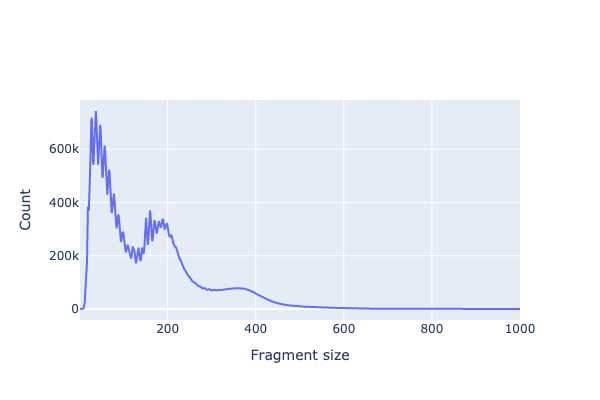

In [7]:
# To plot the fragment size distribution you can use the following function.
out_file = None # <--- Change this to the path where you want to save the plot. Ex. out_file="/path/to/your/output.png"
snap.pl.frag_size_distr(data, interactive=False, out_file=out_file) # Set interactive to True if you want to use the interactive plot.

### TSSenrichment
`snapatac2` uses a `gtf` file to define the TSS and compute the enrichment. For the example we are using the gtf stored in `snapatac2` but you can pass your own `gtf`. This is a **barcode** level metric so it will be stored in `obs` with the name `tsse`.

```sh
obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
```

Along with the TSSe at the barcode level, this function also computes library-level statistics:
- `TSS_profile`: Raw counts around TSS used to compute the enrichment profile.
- `frac_overlap_TSS`: Percentage of fragments overlapping TSS.
- `library_tsse`: Just one number representing the library TSSe.

In [8]:
gtf_file = snap.genome.hg38 # <--- Change this to the path to your gtf file
snap.metrics.tsse(data, gtf_file)
data

AnnData object with n_obs x n_vars = 6603 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

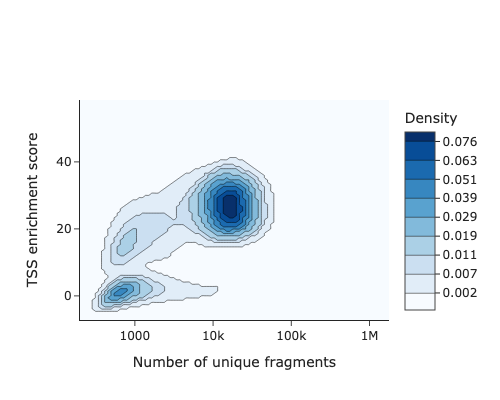

In [9]:
# To plot use the following function.
out_file = None # <--- Change this to the path where you want to save the plot. Ex. out_file="/path/to/your/output.png"
snap.pl.tsse(data, interactive=False, out_file=out_file) # Set interactive to True if you want to use the interactive plot.


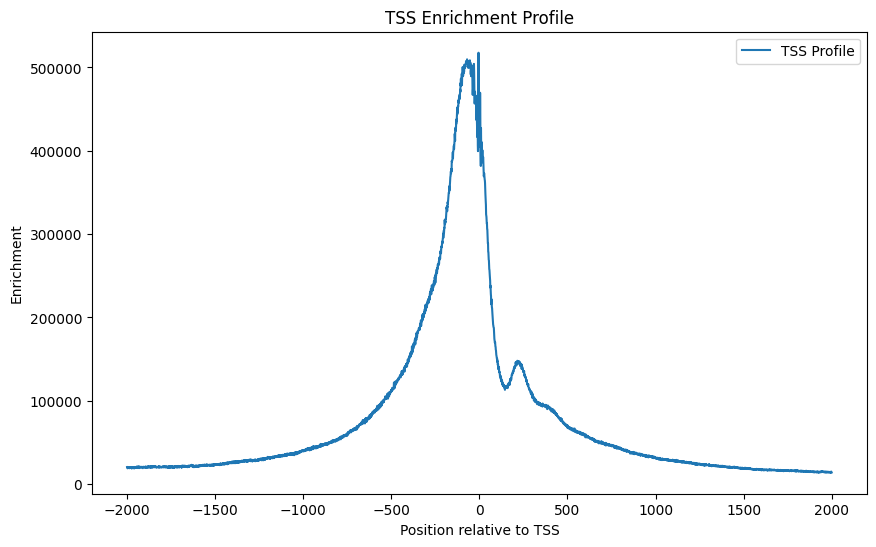

In [16]:
import matplotlib.pyplot as plt

# Extract the TSS profile data
tss_profile = data.uns['TSS_profile']

# Plot the TSS profile
plt.figure(figsize=(10, 6))
positions = range(-2000, 2001)
plt.plot(positions, tss_profile, label='TSS Profile')
plt.xlabel('Position relative to TSS')
plt.ylabel('Enrichment')
plt.title('TSS Enrichment Profile')
plt.legend()
plt.show()

In [17]:
# library TSSe is 
data.uns['library_tsse']

25.884573806275945

### Fraction of fragments in region of interest

`snapatac2` offers the ability to compute the "`fraction of reads in peaks`". The name of the function is misleading because you can pass the regions you want and it will compute the fraction. This is a **barcode** metric so it will appear in `obs`. The name will change because it is define by the user. For the example below it will create `peaks_frac`.
```sh
obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac'
```

In [10]:
regions_file = snap.datasets.cre_HEA() # <--- Change this to the path to your regions file
# For this example I am downloading the cCRE for human.
snap.metrics.frip(data, {"peaks_frac": regions_file})
data.obs['peaks_frac'].head()
data

/var/folders/cj/swr0k_3s7rzflnp6gw1h9l140000gq/T/ipykernel_71313/139490718.py:4: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



AnnData object with n_obs x n_vars = 6603 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

To generalize
```sh
regions_file = "/path/to/your/regions.bed" # <--- Change this to the path to your regions file
snap.metrics.frip(data, {"name_you_choose": regions_file})
data.obs['name_you_choose'].head()
data
```
You can also add more regions at the same time.
```sh
snap.metrics.frip(data,{"promoter_frac": "promoter.bed", "enhancer_frac": "enhancer.bed"}])
```

## Filtering and downstream analyses

In [11]:
# Keep only 'high-quality' cells
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=100000)
data

AnnData object with n_obs x n_vars = 4563 x 0 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

## Creating a barcode x bins count matrix
After filtering, we still have a **0** when we look at count matrix: `4563 x 0`
`snap.pp.add_tile_matrix` takes care of creating the bins and count. There are some important parameter to consider.

- `bin_size`: The default **500**. If you put a number greater than the largest chromosome you will effectively creating a barcode by chromosome matrix because that's the chromosome wil lbe the largest possible bin. 
- `exclude_chroms`: The default is to remove `['chrM', 'chrY', 'M', 'Y']`. It's good to remember that this default exists because for some analyses you might want `chrM`.
- `min_frag_size` and `max_frag_size`: The default is to not filter based on fragment size. When we align we set the max fragment size to 2000bp but it really depends on the experiment. The idea is that fragments with such largest insertion sizes are artifacts.
- `counting_strategy`: It must be one of the following: “fragment”, “insertion”, or “paired-insertion”. “fragment” means the feature counts are assigned based on the number of fragments that overlap with a region of interest. “insertion” means the feature counts are assigned based on the number of insertions that overlap with a region of interest. “paired-insertion” is similar to “insertion”, but it only counts the insertions once if the pair of insertions of a fragment are both within the same region of interest.

In [12]:
# Now we can add the tile matrix and select the features.
snap.pp.add_tile_matrix(data,
                        bin_size=500,
                        exclude_chroms=['chrM', 'chrY', 'M', 'Y'],
                        min_frag_size=0,
                        max_frag_size=10000,
                        counting_strategy='paired-insertion'
                        )
data

AnnData object with n_obs x n_vars = 4563 x 6062095 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

Now we have a count matrix:
`4563 x 6062095`

In [13]:
# We don't usually need all the features. We can select the top features.
# I don't have a strategy on how to choose the number.
# It is important to know that we have the option to use a whitelist or a blacklist.
# The whitelist is a list of features that you want to keep.
# The blacklist is a list of features that you want to remove.
snap.pp.select_features(data, n_features=250000, whitelist=None, blacklist=None)
data

2025-02-28 12:54:44 - INFO - Selected 250000 features.


AnnData object with n_obs x n_vars = 4563 x 6062095 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac'
    var: 'count', 'selected'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

## Doublets filtering
I haven't played with this but I want to note that this possibility exist.

In [14]:
snap.pp.scrublet(data)
snap.pp.filter_doublets(data)
data

2025-02-28 12:54:57 - INFO - Simulating doublets...
2025-02-28 12:54:59 - INFO - Spectral embedding ...
2025-02-28 12:57:21 - INFO - Calculating doublet scores...
2025-02-28 12:57:42 - INFO - Detected doublet rate = 3.024%


AnnData object with n_obs x n_vars = 4425 x 6062095 backed at './pbmc_snapatac2_example.h5ad'
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'peaks_frac', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'frag_size_distr', 'frac_overlap_TSS', 'scrublet_sim_doublet_score', 'doublet_rate', 'reference_sequences', 'TSS_profile', 'library_tsse'
    obsm: 'fragment_paired'

# Clustering and UMAP

There are so many parameters and it really depends on the dataset so I am just putting the name of the functions.

In [15]:
snap.tl.spectral(data)
snap.tl.umap(data)
snap.pp.knn(data)
snap.tl.leiden(data)
snap.pl.umap(data, color='leiden', interactive=False, height=500)


ModuleNotFoundError: No module named 'umap'

# Extremely important. Close the file before exiting.

In [26]:
data.close()
data

Closed AnnData object